# Bonus question

## Data generation

The problem deals with the identification of an AR(1) process
through an AR(2) process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

N = 10000
DELAYS = 2
DIM = N + DELAYS
T = np.arange(DIM)

noise = 0.01 * np.random.uniform(-0.5, 0.5, (DIM,1))

$$
y(t) = a^*y(t-1) + e(t)
$$

$$
\hat{y}(t) = a_1y(t-1) + a_2y(t-2)
$$

In [2]:
true_a = 0.7

def true_model(true_a, y, noise):
    return true_a*y + noise

def exper_optim_model(exper_a_1, exper_a_2, y_1, y_2):
    return exper_a_1*y_1 + exper_a_2*y_2

$$
Y = 
\left[
\begin{array}{c} y(2) \\ y(3) \\ \vdots \\ y(t_{N+1})\end{array}
\right]
$$

$$
\Phi = 
\left[
\begin{array}
{cc} y(1) & y(0) \\ \vdots & \vdots \\ y(t_{N}) & y(t_{N-1})
\end{array}
\right]
$$

In [3]:
Y = np.empty((DIM,1))

y0 = 1
Y[0] = y0

for k in range(1, DIM):
    Y[k] = true_model(true_a, Y[k-1,0], noise[k,0])
    
trajectory = Y

Y_T_2 = Y[0:N]
Y_T_1 = Y[1:N+1]
Y = Y[2:DIM]

PHI = np.hstack((Y_T_1, Y_T_2))

## LS

$$
\hat{\Theta}_{PEM} = \left(\Phi^T\Phi\right)^{-1}\Phi^TY
$$

In [4]:
THETA = np.linalg.inv(PHI.T @ PHI) @ PHI.T @ Y

a_1_pem = THETA[0]
a_2_pem = THETA[1]
print('Optimal parameters from PEM method:')
print(f'a_1 = {a_1_pem}, a_2 = {a_2_pem}')

Y_PEM = np.empty((DIM,1))
Y_PEM[0] = trajectory[0]
Y_PEM[1] = trajectory[1]
for k in range(2, DIM):
    Y_PEM[k] = exper_optim_model(a_1_pem, a_2_pem,
                                 Y_PEM[k-1], Y_PEM[k-2])

Optimal parameters from PEM method:
a_1 = [0.70153036], a_2 = [-0.00016071]


## Yule-Walker

$$
\Theta_{YW} = \left[ \begin{array}{cc}
r_y(0) & r_y(1) \\
r_y(1) & r_y(0)
\end{array}
\right]^{-1}
\left[
\begin{array}{c}
r_y(1) \\ r_y(2)
\end{array}
\right]
$$

In [5]:
r_y_0 = (trajectory*trajectory).sum()/DIM
r_y_1 = (trajectory[0:DIM-1]*trajectory[1:DIM]).sum()/(DIM-1)
r_y_2 = (trajectory[0:DIM-2]*trajectory[2:DIM]).sum()/(DIM-2)

M = np.array([[r_y_0, r_y_1],
              [r_y_1, r_y_0]])

B = np.array([[r_y_1, r_y_2]]).T

X = np.linalg.inv(M) @ B

a_1_yw = X[0]
a_2_yw = X[1]

print('Yule-Walker equations')
print(f'a_1 = {a_1_yw}, a_2 = {a_2_yw}')

Y_YW = np.empty((DIM,1))
Y_YW[0] = trajectory[0]
Y_YW[1] = trajectory[1]
for k in range(2, DIM):
    Y_YW[k] = exper_optim_model(a_1_yw, a_2_yw,
                                 Y_YW[k-1], Y_YW[k-2])

Yule-Walker equations
a_1 = [0.69986344], a_2 = [0.00105617]


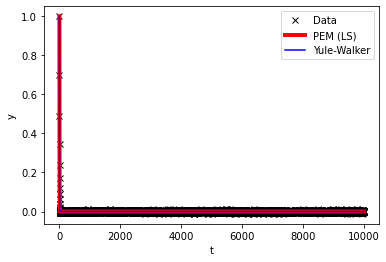

In [6]:
plt.plot(T, trajectory, "kx")
plt.plot(T, Y_PEM, "r", linewidth=4)
plt.plot(T, Y_YW, "b")

plt.xlabel("t")
plt.ylabel("y")
plt.legend(("Data", "PEM (LS)", "Yule-Walker"))
plt.show()

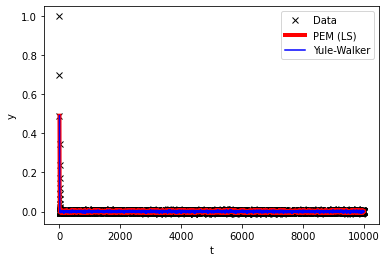

In [7]:
plt.plot(T, trajectory, "kx")
plt.plot(T[2::], PHI @ THETA, "r", linewidth=4)
plt.plot(T[2::], PHI @ X, "b")

plt.xlabel("t")
plt.ylabel("y")
plt.legend(("Data", "PEM (LS)", "Yule-Walker"))
plt.show()